In [1]:
from abc import ABCMeta, abstractmethod

import numpy as np
import matplotlib.pyplot as plt

$\text{minimize}\ x^TAx\quad \text{subject to}\ x\in S^{n-1}$

In [2]:
import sys

sys.path += ['..']
from modules.gradient_descent import RayleighQuotientGD, RayleighQuotientSphereGD

In [3]:
# A = np.array([[2, 1], [1, 2]], dtype=float)
# x0 = np.array([1, 0], dtype=float)

# parameters
step_size = 1
max_iter = 40
size = 5000

# initialize variables
np.random.seed(0)
A = np.random.randn(size, size)
A = np.dot(A, A.T)
x0 = np.random.randn(size)
x0 /= np.linalg.norm(x0)

rq = RayleighQuotientGD(A=A, step_size=step_size, max_iter=max_iter, extended_output=True)
rqs = RayleighQuotientSphereGD(A=A, step_size=step_size, max_iter=max_iter, extended_output=True)

%time res1 = rq.optimize(x0)
%time res2 = rqs.optimize(x0)

CPU times: user 19.1 s, sys: 119 ms, total: 19.2 s
Wall time: 9.76 s
CPU times: user 19.1 s, sys: 50.6 ms, total: 19.1 s
Wall time: 9.58 s


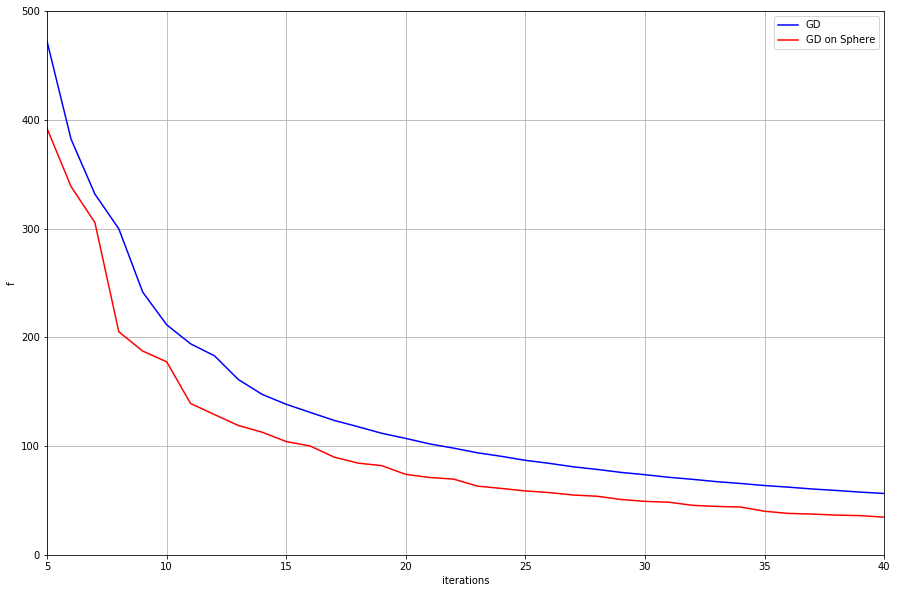

In [6]:
plt.figure(figsize=(15,10))
plt.plot(rq.f, 'b', label='GD')
plt.plot(rqs.f, 'r', label='GD on Sphere')
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('f')
plt.xlim((5, max_iter))
plt.ylim((0, 500))
plt.legend()
plt.show()